In [1]:
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#text data
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv('Mental Health Dataset.csv')

In [3]:
data.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10392 non-null  object
 2   intensity  10392 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 243.7+ KB


### Checking NaN values

In [5]:
data.isna().sum()

posts        1
predicted    0
intensity    0
dtype: int64

In [6]:
#only 1 nan. Drop nan
data.dropna(inplace=True)

## Checking the distribution

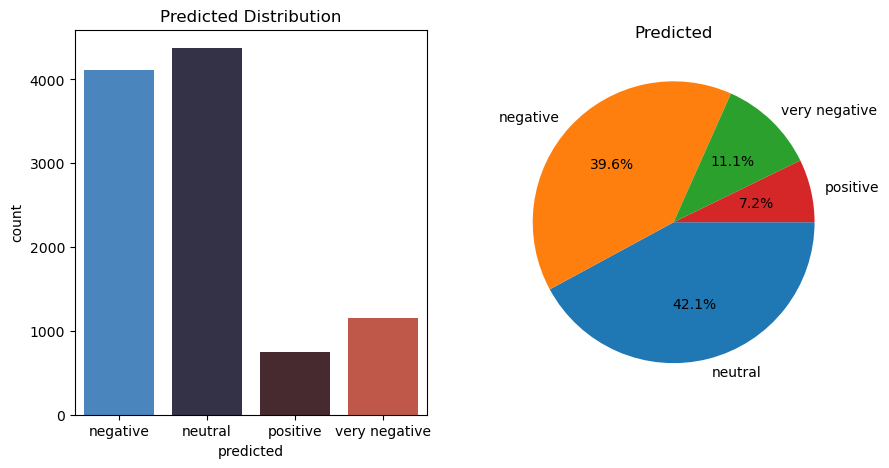

In [7]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data=data, x='predicted', palette='icefire')
plt.title("Predicted Distribution")

plt.subplot(1,2,2)
plt.pie(data['predicted'].value_counts(), labels= data['predicted'].value_counts().index,
       autopct= '%.1f%%', counterclock= False)
plt.title("Predicted")
plt.show()

In [8]:
#checking intensity column
data['intensity'].value_counts()

 0    4374
-1    4112
-2    1155
 1     750
Name: intensity, dtype: int64

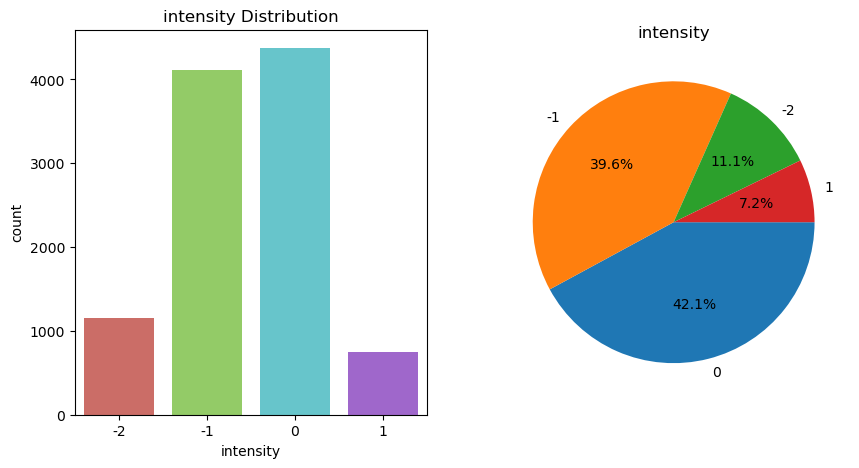

In [9]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data=data, x='intensity', palette='hls')
plt.title("intensity Distribution")

plt.subplot(1,2,2)
plt.pie(data['intensity'].value_counts(), labels= data['intensity'].value_counts().index,
       autopct= '%.1f%%', counterclock= False)
plt.title("intensity")
plt.show()

In [10]:
from wordcloud import WordCloud
def word_cloud(df,col, count = 100, color = 'white'):
    text = ' '.join(df[col].values)
    wd = WordCloud(background_color= color, max_words=count).generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wd)
    plt.title(f'Top {count} words of {col}')
    plt.axis('off')
    plt.show()

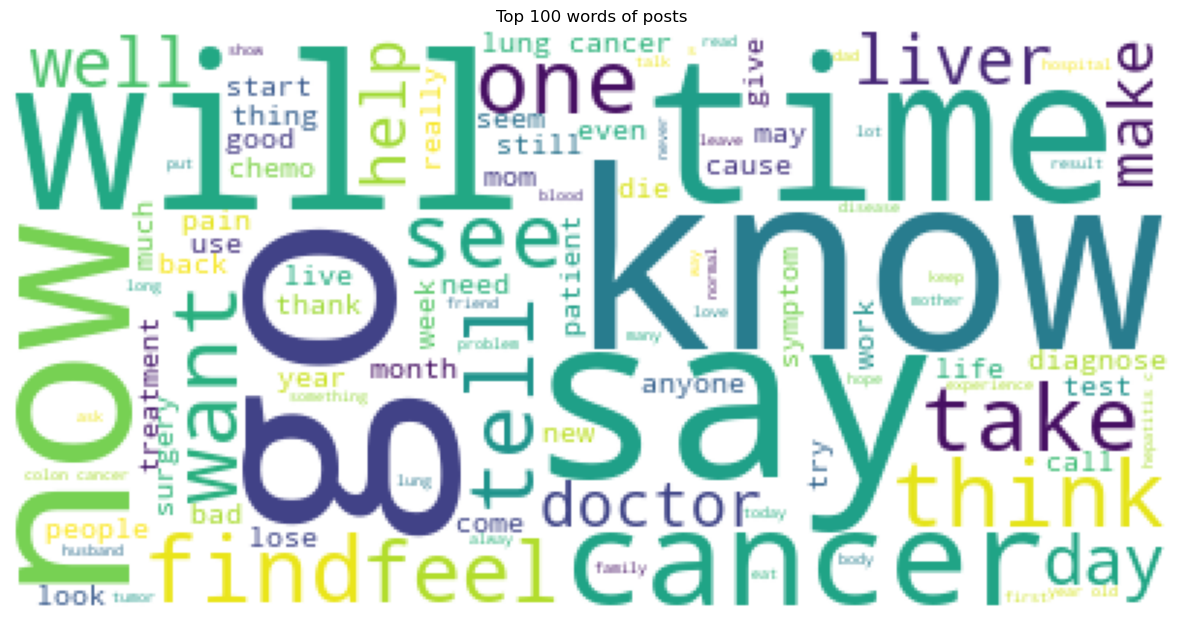

In [11]:
word_cloud(data, 'posts')

In [12]:
#checking the length of each post
data['post_len'] = data['posts'].apply(lambda x: len(x.strip().split(' ')))

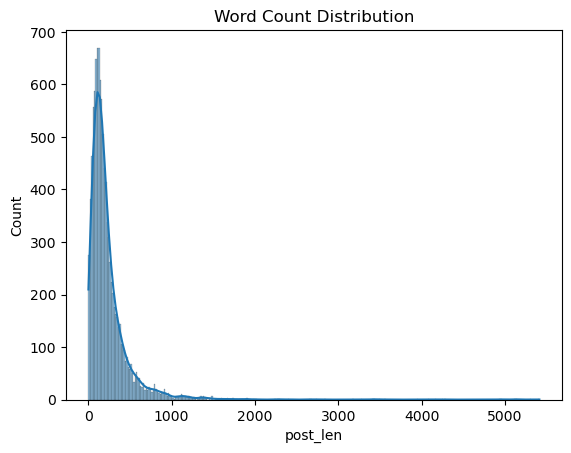

In [13]:
sns.histplot(data['post_len'], kde = True)
plt.title("Word Count Distribution")
plt.show()

In [14]:
data.describe()

,intensity,post_len
count,10391.000000,10391.000000
mean,-0.545857,234.153113
std,0.783977,289.057341
min,-2.000000,1.000000
25%,-1.000000,93.000000
50%,-1.000000,162.000000
75%,0.000000,276.000000
max,1.000000,5413.000000


- As per above it is noted that post len having 1 word and max word 5413. We need to check the data

In [15]:
lower_threshold = 5
upper_thershold = 1500
#checking data where number of words are less than lower_threshold
print(f'Data where number of words are less than {lower_threshold}',data[data['post_len'] <= lower_threshold].shape[0]) 
#checking data where number of words are less than upper_thershold
print(f'Data where number of words are more than {upper_thershold}',data[data['post_len'] >= upper_thershold].shape[0])

Data where number of words are less than {lower_threshold} 45
Data where number of words are less than {upper_thershold} 57


In [16]:
#removing the data where word count is beyond upper_thershold and lower_thershold
data = data[data['post_len'] >5]
data = data[data['post_len']<1500]

## Cleaning the data

In [17]:
punc = list(string.punctuation)
STOPWORDS = set(stopwords.words('english'))
wl = WordNetLemmatizer()
abbriviation = {'dr' : 'doctor'}

In [18]:
def textCleaning(text):
    text = text.strip().lower()
    punc_free_text = ''.join([i for i in text if i not in punc])
    text = re.sub('[^A-Za-z0-9]',' ',punc_free_text)
    words = text.split(" ")
    clean_words = [wl.lemmatize(abbriviation.get(word,word)) for word in words if word not in STOPWORDS]
    return ' '.join(clean_words)

In [19]:
data['clean_posts'] = data['posts'].apply(textCleaning)

In [20]:
data.loc[100,'posts']

'my good friend who have been battle chronic leukemia for over a year along with a about of mrsa receive a call from her father yesterday he was diagnose yesterday morning with esophageal cancer emotionally she is in terrible shape as they have not been able to get she in remission she is extremely close to her father as he have been her true liferaft throughtout this last year and now this blow I am afraid for both of they the prognosis for esophageal cancer is never good and if she lose he she will probably give up her fight our father can and do work miracle please add jennifer and john to your prayer list thank you dee'

In [21]:
data.loc[100,'clean_posts']

'good friend battle chronic leukemia year along mrsa receive call father yesterday diagnose yesterday morning esophageal cancer emotionally terrible shape able get remission extremely close father true liferaft throughtout last year blow afraid prognosis esophageal cancer never good lose probably give fight father work miracle please add jennifer john prayer list thank dee'

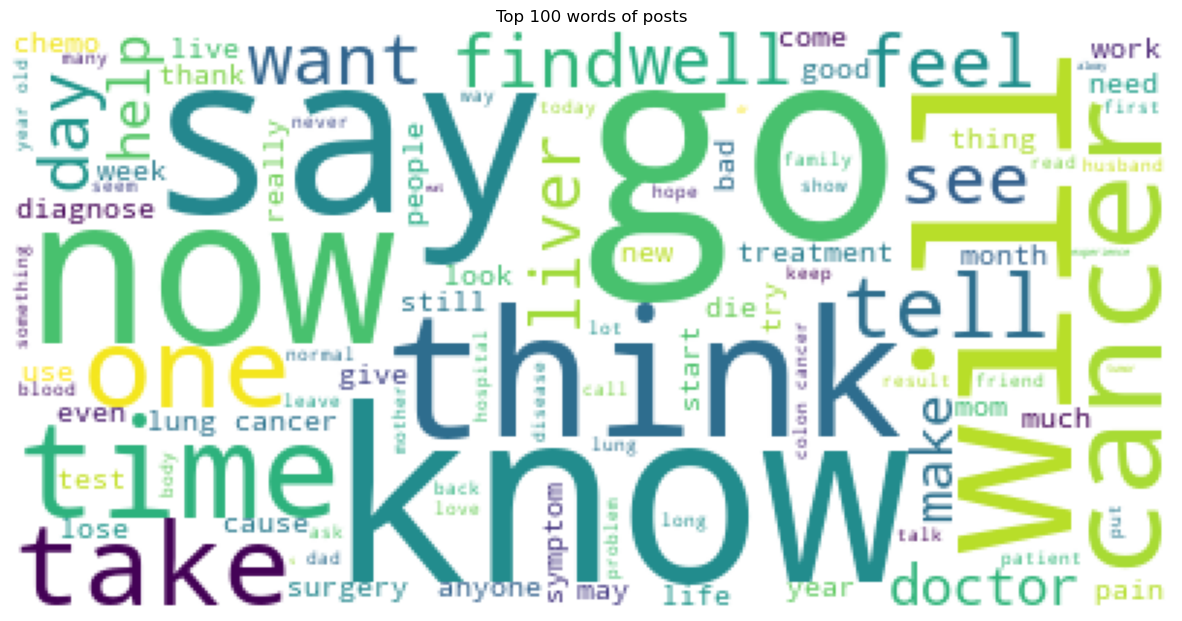

In [22]:
word_cloud(data, 'posts')

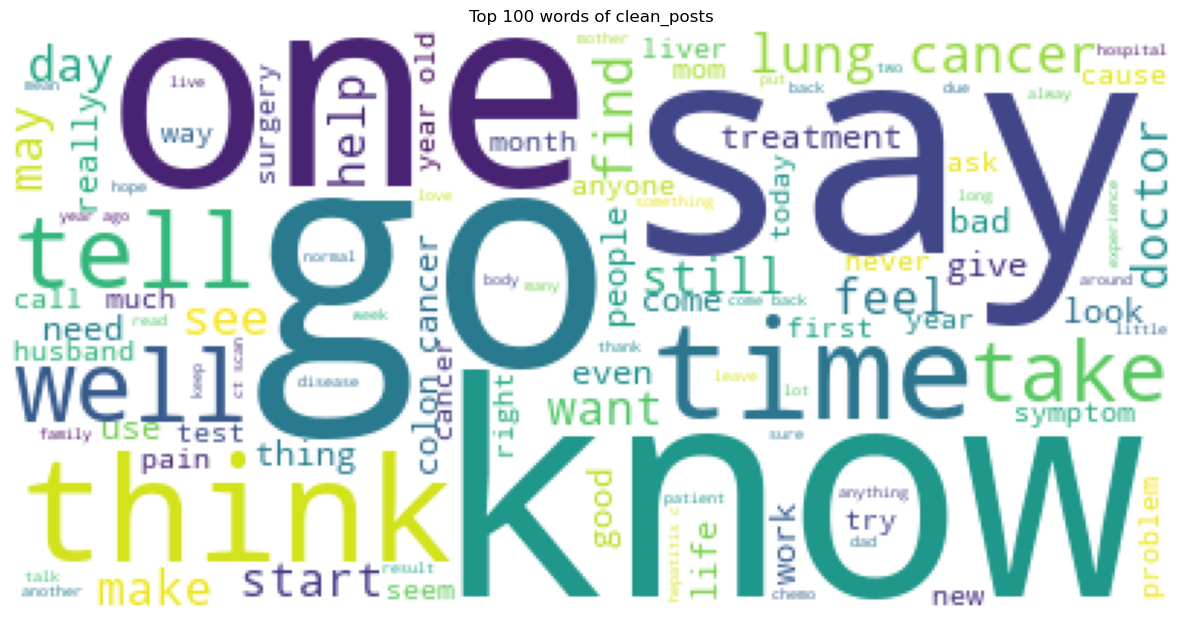

In [23]:
word_cloud(data, 'clean_posts', color='white')

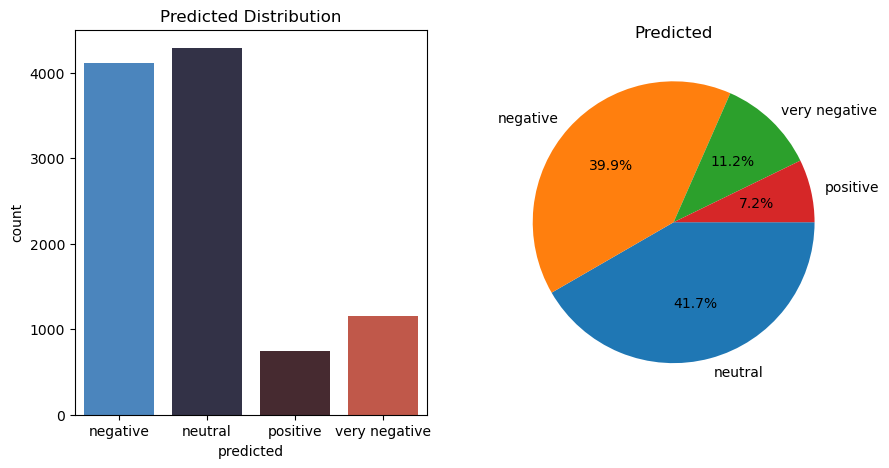

In [24]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data=data, x='predicted', palette='icefire')
plt.title("Predicted Distribution")

plt.subplot(1,2,2)
plt.pie(data['predicted'].value_counts(), labels= data['predicted'].value_counts().index,
       autopct= '%.1f%%', counterclock= False)
plt.title("Predicted")
plt.show()

## Model building

In [25]:
X = data['clean_posts']
Y = data['predicted']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#model evaluation
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, f1_score, auc
from sklearn.model_selection import cross_val_score

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42, test_size=0.2)

In [28]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (8231,)
X_test shape:  (2058,)
y_train shape:  (8231,)
y_test shape:  (2058,)


In [29]:
data.shape

(10289, 5)

In [30]:
data[data['post_len'] > 1500].shape

(0, 5)

In [31]:
#bigram model
cv = CountVectorizer(ngram_range = (1,2)) 
tfidf = TfidfVectorizer(ngram_range = (1,2))

In [32]:
cv.fit(X_train)

CountVectorizer(ngram_range=(1, 2))

In [33]:
tfidf.fit(X_train)

TfidfVectorizer(ngram_range=(1, 2))

In [34]:
X_train_cv = cv.transform(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_cv = cv.transform(X_test)
X_test_tfidf = tfidf.transform(X_test)

In [35]:
#lable encoding the predictor
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [36]:
mb = MultinomialNB()
rf = RandomForestClassifier(oob_score= True, random_state= 42, class_weight='balanced', n_estimators= 500, max_depth= 12)
xgb = XGBClassifier()

In [37]:
def create_df(data, models, cols):
    index = []
    for model in models:
        model_name = type(model).__name__
        # Ensure unique model names
        if model_name in index:
            model_name += '_hyp'
        index.append(model_name)

    df = pd.DataFrame(data=data, index=index)
    df.rename(columns=dict(zip(df.columns, cols)), inplace=True)
    return df

def training(models, X_train, y_train):
    metrics = {'accuracy': [], 'f1_score': []}
    trained_models = []
    
    for model in models:
        model.fit(X_train, y_train)
        print(f'Trained {type(model).__name__}')
        
        # Cross-validation to compute accuracy
        try:
            accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
            metrics['accuracy'].append(accuracy.mean())
        except Exception as e:
            print(f"Error in cross_val_score for {type(model).__name__}: {e}")
            metrics['accuracy'].append(None)
        
        # Predictions and F1 score
        try:
            y_pred = model.predict(X_train)
            f1 = f1_score(y_train, y_pred, average='weighted')
            metrics['f1_score'].append(f1)
        except Exception as e:
            print(f"Error in prediction or F1 score calculation for {type(model).__name__}: {e}")
            metrics['f1_score'].append(None)
        
        trained_models.append(model)
    
    cols = ['train_acc', 'train_f1']
    metric_df = create_df(data=metrics, models=trained_models, cols=cols)
    return trained_models, metric_df
    
def testing(models, X=X_test, y=y_test):
    metric = {}
    f1_scores = []
    acc_scores = []  # Renamed to avoid conflict with the function name
    for model in models:
        y_pred = model.predict(X)
        acc = model.score(X, y)  # Using model.score() for accuracy calculation
        acc_scores.append(acc)
        f1 = f1_score(y, y_pred,average='weighted')
        f1_scores.append(f1)
    cols = ['test_acc', 'test_f1']
    metric['accuracy'] = acc_scores  # Renamed the key to 'accuracy'
    metric['f1_score'] = f1_scores
    metric_df = create_df(data=metric, models= models, cols=cols)
    return metric_df

def classification_report_matrix(models,X_test, y_test):
    for model in models:
        y_pred = model.predict(X_test)
        print(type(model).__name__)
        print("=="*30)
        print(classification_report(y_test, y_pred))
        print(f"f1_score: {f1_score(y_test, y_pred,average='weighted')}")
        plt.figure(figsize=(5,5))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt = '.0f',
                   xticklabels= encoder.classes_, yticklabels=encoder.classes_)
        plt.title(type(model).__name__)
        print("=="*30)
        
# function to find the optimal threshold
def find_optimal_threshold(fpr, tpr, thresholds):
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# Plot ROC curve and mark the best threshold
def roc_auc_curve(models):
    for model in models:
        plt.figure(figsize=(5, 5))
        if type(model).__name__ == 'Sequential':
            y_pred_proba = model.predict(X_test)
        else:
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')

        # Find the optimal threshold
        optimal_threshold = find_optimal_threshold(fpr, tpr, thresholds)

        # Plot the best threshold line
        plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], marker='o', color='black', label=f'Best Threshold = {optimal_threshold:.2f}')

        plt.title(f'{type(model).__name__}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.grid(True)
        plt.show()


In [38]:
models = [mb, rf, xgb]
train_models, metric_df = training(models=models, X_train=X_train_cv, y_train= y_train)

Trained MultinomialNB
Trained RandomForestClassifier
Trained XGBClassifier


In [39]:
metric_df

,train_acc,train_f1
MultinomialNB,0.589236,0.858212
RandomForestClassifier,0.664801,0.759546
XGBClassifier,0.718380,0.955852


In [40]:
testing_df = testing(models= train_models, X=X_test_cv, y= y_test)

In [41]:
testing_df

,test_acc,test_f1
MultinomialNB,0.604956,0.554721
RandomForestClassifier,0.651118,0.641620
XGBClassifier,0.729349,0.720553


MultinomialNB
              precision    recall  f1-score   support

           0       0.51      0.97      0.67       828
           1       0.89      0.49      0.63       864
           2       0.80      0.05      0.10       147
           3       0.81      0.06      0.11       219

    accuracy                           0.60      2058
   macro avg       0.76      0.39      0.38      2058
weighted avg       0.73      0.60      0.55      2058

f1_score: 0.5547207401849521
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       828
           1       0.73      0.77      0.75       864
           2       0.51      0.17      0.26       147
           3       0.46      0.85      0.60       219

    accuracy                           0.65      2058
   macro avg       0.59      0.59      0.55      2058
weighted avg       0.66      0.65      0.64      2058

f1_score: 0.6416204861909497
XGBClassifier
              precisi

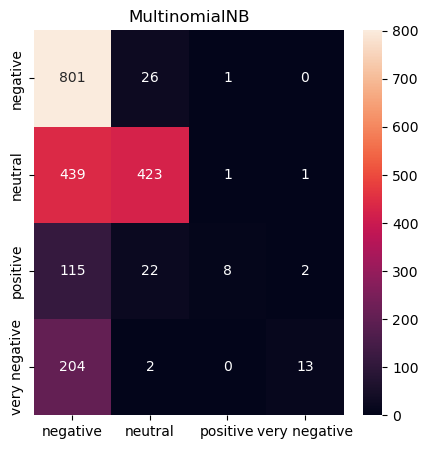

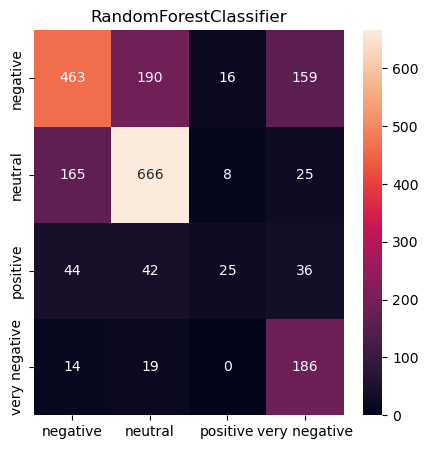

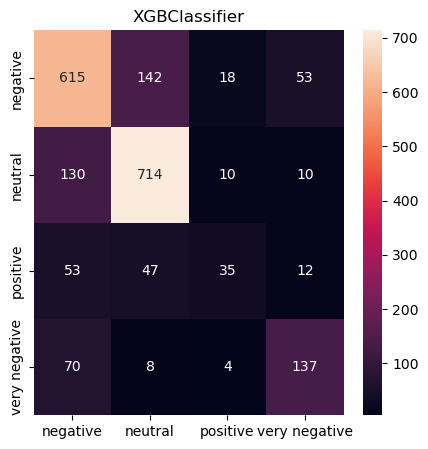

In [42]:
classification_report_matrix(models=train_models, X_test=X_test_cv, y_test= y_test)

### With TFIDF vector

In [43]:
mb = MultinomialNB()
rf = RandomForestClassifier(oob_score= True, random_state= 42, class_weight='balanced', n_estimators= 500, max_depth= 12)
xgb = XGBClassifier()
models = [mb, rf, xgb]
train_models_tfidf, metric_df_tfidf = training(models=models, X_train=X_train_cv, y_train= y_train)

Trained MultinomialNB
Trained RandomForestClassifier
Trained XGBClassifier


In [44]:
metric_df_tfidf

,train_acc,train_f1
MultinomialNB,0.589236,0.858212
RandomForestClassifier,0.664801,0.759546
XGBClassifier,0.718380,0.955852


In [45]:
testing_df_tfidf = testing(models= train_models_tfidf, X=X_test_cv, y= y_test)
testing_df_tfidf

,test_acc,test_f1
MultinomialNB,0.604956,0.554721
RandomForestClassifier,0.651118,0.641620
XGBClassifier,0.729349,0.720553


MultinomialNB
              precision    recall  f1-score   support

           0       0.51      0.97      0.67       828
           1       0.89      0.49      0.63       864
           2       0.80      0.05      0.10       147
           3       0.81      0.06      0.11       219

    accuracy                           0.60      2058
   macro avg       0.76      0.39      0.38      2058
weighted avg       0.73      0.60      0.55      2058

f1_score: 0.5547207401849521
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       828
           1       0.73      0.77      0.75       864
           2       0.51      0.17      0.26       147
           3       0.46      0.85      0.60       219

    accuracy                           0.65      2058
   macro avg       0.59      0.59      0.55      2058
weighted avg       0.66      0.65      0.64      2058

f1_score: 0.6416204861909497
XGBClassifier
              precisi

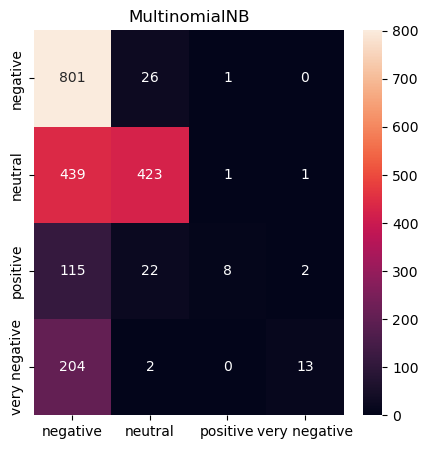

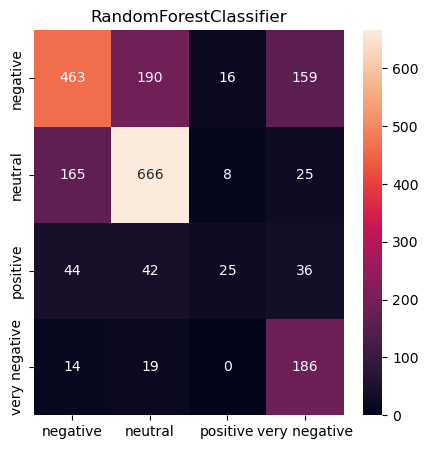

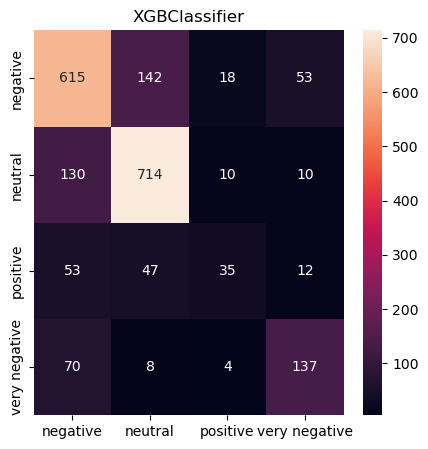

In [46]:
classification_report_matrix(models=train_models_tfidf, X_test=X_test_cv, y_test= y_test)

### Using Word2Vec

In [47]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [48]:
def word_list(data):
    words = []
    for i in range(data.shape[0]):
        words.append(simple_preprocess(data['clean_posts'][i]))
    return words

In [49]:
data.reset_index(drop=True, inplace= True)
words = word_list(data)

In [50]:
model = Word2Vec(words, vector_size = 100, window = 5)

In [51]:
model.corpus_count

10289

In [71]:
def avgword2vec(doc,word_model):
    # Filter words that are in the model's vocabulary
    word_vectors = [word_model.wv[word] for word in doc if word in model.wv.index_to_key]
    
    # If there are no valid words, return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(model.wv.vector_size)
    
    # Compute the mean of the valid word vectors
    return np.mean(word_vectors, axis=0)

In [72]:
from tqdm import tqdm
X = []
for i in tqdm(range(len(words))):
    X.append(avgword2vec(words[i],model))

100%|███████████████████████████████████████████████████████████████████████████| 10289/10289 [00:32<00:00, 321.31it/s]


In [56]:
X[0]

array([-0.35175547, -0.1199311 , -0.07204027, -0.22168191,  0.33330342,
       -0.12003106,  0.4633307 ,  0.3980299 , -0.67803824, -0.2516314 ,
       -0.4034888 , -0.5341054 , -0.27108982,  0.7831363 , -0.34477696,
       -0.29207844, -0.06651819,  0.43842185,  0.1351529 , -0.72218835,
        0.05607871, -0.2165212 ,  0.44897994, -0.2841458 ,  0.41814634,
        0.25085506, -0.173077  , -0.47530362,  0.10001744, -0.4237135 ,
        0.19016868, -0.02848035,  0.52240133, -0.95460683, -0.23367524,
        0.27834514,  0.05321072,  0.64591986,  0.02904593, -0.980355  ,
        0.1603292 , -0.6092854 , -0.35247415, -0.2995282 , -0.36245102,
       -0.4356161 ,  0.22631276, -0.23593777,  0.34200725, -0.04544136,
        0.35894418, -0.24556544,  0.17084292,  0.24983576,  0.05387092,
        0.37724218,  0.1758144 , -0.08223091, -0.19887973, -0.1500953 ,
        0.11469514, -0.20165224,  0.42660466, -0.17419666, -0.09861596,
        0.828924  ,  0.7235765 ,  0.14142373, -0.36247718, -0.11

In [57]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state= 42, train_size=0.8, stratify= Y)

In [58]:
encoder = LabelEncoder()
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [59]:
mb = MultinomialNB()
rf = RandomForestClassifier(oob_score= True, random_state= 42, class_weight='balanced', n_estimators= 500, max_depth= 12)
xgb = XGBClassifier()
models = [mb, rf, xgb]

In [60]:
train_models_word2vec, metric_df_word2vec = training(models=models, X_train=X_train, y_train= y_train)

Trained MultinomialNB
Trained RandomForestClassifier
Trained XGBClassifier


In [61]:
metric_df_word2vec

,train_acc,train_f1
MultinomialNB,0.610375,0.553412
RandomForestClassifier,0.692746,0.945237
XGBClassifier,0.699915,0.998785


In [80]:
testing_df_word2vec = testing(models= train_models_word2vec, X=X_test, y= y_test)
testing_df_word2vec

,test_acc,test_f1
MultinomialNB,0.614189,0.555555
RandomForestClassifier,0.697279,0.696130
XGBClassifier,0.710884,0.704901


MultinomialNB
              precision    recall  f1-score   support

           0       0.54      0.81      0.65       822
           1       0.74      0.70      0.72       857
           2       0.00      0.00      0.00       148
           3       0.00      0.00      0.00       231

    accuracy                           0.61      2058
   macro avg       0.32      0.38      0.34      2058
weighted avg       0.52      0.61      0.56      2058

f1_score: 0.5555546042099309
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       822
           1       0.81      0.72      0.76       857
           2       0.43      0.33      0.38       148
           3       0.63      0.68      0.66       231

    accuracy                           0.70      2058
   macro avg       0.63      0.62      0.62      2058
weighted avg       0.70      0.70      0.70      2058

f1_score: 0.6961302982849583
XGBClassifier
              precisi

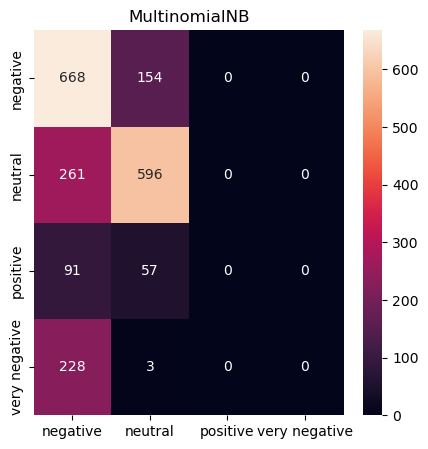

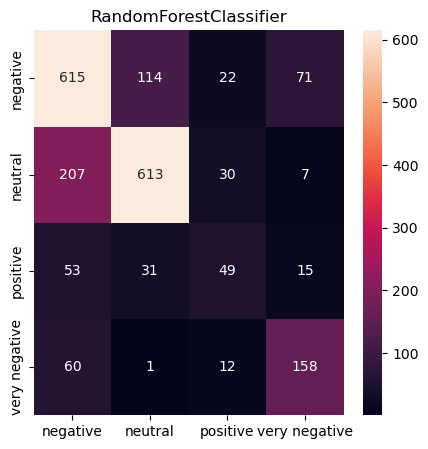

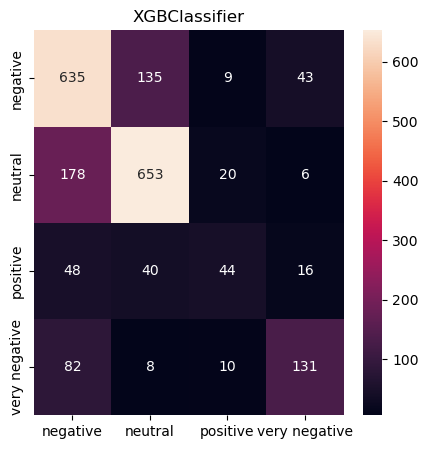

In [63]:
classification_report_matrix(models=train_models_word2vec, X_test=X_test, y_test= y_test)

### With pretrained Model

In [64]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [65]:
glove_model = gensim.downloader.load('glove-wiki-gigaword-300')

In [76]:
def avgpretrained(doc,word_model):
    # Filter words that are in the model's vocabulary
    word_vectors = [word_model[word] for word in doc if word in word_model.index_to_key]
    
    # If there are no valid words, return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(word_model.vector_size)
    
    # Compute the mean of the valid word vectors
    return np.mean(word_vectors, axis=0)

In [78]:
X = []
for i in tqdm(range(len(words))): #using the same words list which contains sentence wise each word
    X.append(avgpretrained(words[i],glove_model))

100%|████████████████████████████████████████████████████████████████████████████| 10289/10289 [07:05<00:00, 24.19it/s]


In [79]:
X[0]

array([-1.21127814e-01,  5.13620041e-02, -1.09194763e-01, -1.63100809e-02,
        4.06004675e-03,  4.85810637e-02, -1.22598438e-02,  9.34660900e-04,
        5.13992645e-02, -1.19698024e+00,  8.40862766e-02, -1.16184764e-01,
       -1.70982222e-03,  1.85593031e-02,  4.05378127e-03,  3.51927318e-02,
       -1.19103327e-01, -6.70119151e-02,  8.74371156e-02,  2.55458821e-02,
        4.14110012e-02,  1.28742352e-01,  1.46673307e-01, -5.11305481e-02,
       -2.07572311e-01, -2.94212485e-03,  1.47413999e-01, -8.89379457e-02,
        3.13891470e-02, -4.24624681e-02,  3.61355999e-03,  1.84544414e-01,
       -1.12594374e-01, -7.55738541e-02, -8.04717779e-01,  9.21533108e-02,
       -7.62427300e-02,  1.56658776e-02, -1.86391510e-02, -5.75263239e-02,
        5.43534709e-03, -1.90744027e-01,  3.33497970e-04, -9.35845897e-02,
        1.92127489e-02,  4.25864197e-02,  1.25528932e-01,  3.16338353e-02,
       -8.30063894e-02, -3.19068171e-02,  1.09642707e-01, -1.54677466e-01,
       -2.78842580e-02, -

In [81]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state= 42, train_size=0.8, stratify= Y)

In [82]:
encoder = LabelEncoder()
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [84]:
mb = MultinomialNB()
rf = RandomForestClassifier(oob_score= True, random_state= 42, class_weight='balanced', n_estimators= 500, max_depth= 12)
xgb = XGBClassifier(n_estimators = 500,max_depth= 7, learning_rate = 0.001, random_state = 42)
models = [mb, rf, xgb]

In [85]:
train_models_pretrain, metric_df_pretrain = training(models=models, X_train=X_train, y_train= y_train)

Trained MultinomialNB
Trained RandomForestClassifier
Trained XGBClassifier


In [86]:
metric_df_pretrain

,train_acc,train_f1
MultinomialNB,0.589235,0.534306
RandomForestClassifier,0.692381,0.970033
XGBClassifier,0.670634,0.852955


In [87]:
testing_df_pretrain = testing(models= train_models_pretrain, X=X_test, y= y_test)
testing_df_pretrain

,test_acc,test_f1
MultinomialNB,0.588435,0.531832
RandomForestClassifier,0.679786,0.668794
XGBClassifier,0.676385,0.662785


MultinomialNB
              precision    recall  f1-score   support

           0       0.52      0.72      0.60       822
           1       0.68      0.72      0.70       857
           2       0.00      0.00      0.00       148
           3       0.00      0.00      0.00       231

    accuracy                           0.59      2058
   macro avg       0.30      0.36      0.33      2058
weighted avg       0.49      0.59      0.53      2058

f1_score: 0.5318318348704559
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.63      0.76      0.68       822
           1       0.78      0.72      0.75       857
           2       0.44      0.14      0.21       148
           3       0.63      0.62      0.62       231

    accuracy                           0.68      2058
   macro avg       0.62      0.56      0.57      2058
weighted avg       0.68      0.68      0.67      2058

f1_score: 0.6687941649494349
XGBClassifier
              precisi

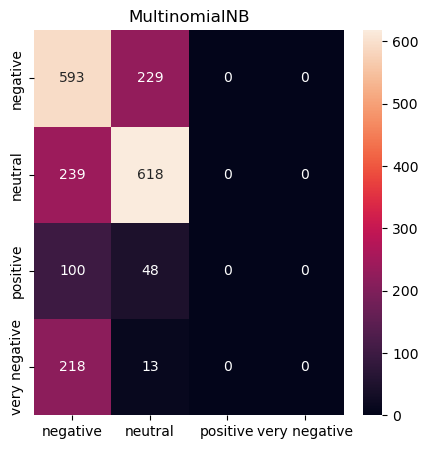

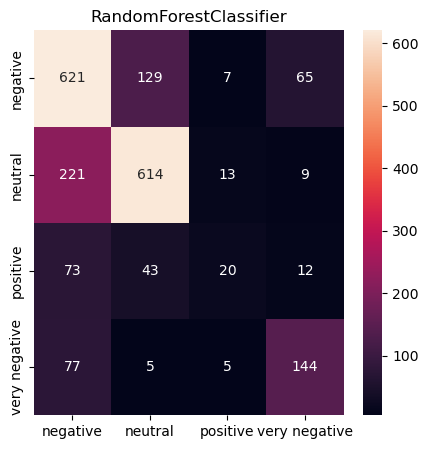

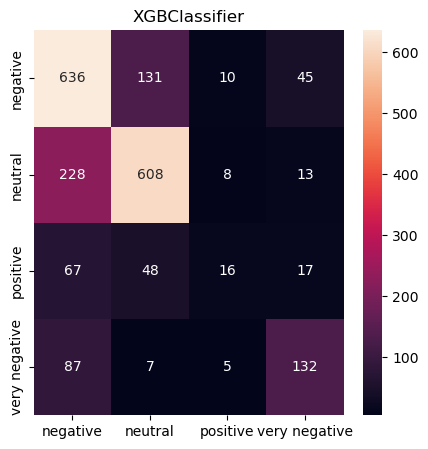

In [88]:
classification_report_matrix(models=train_models_pretrain, X_test=X_test, y_test= y_test)